In [ ]:
# Execute before using this notebook if using google colab
kernel = str(get_ipython())
if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

In [50]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from utils import plot_scatter

# Exercise 1

Implement the formula for the __Euclidian distance__ in python. 


$$d(p,q) = \sqrt{\sum_{n=1}^N (p_i - q_i)^2}$$

Use the following assumptions:

- solution should be a function that takes two parameters $p$ and $q$

- the parameters should be of the type `np.array`

Calculate the euclidean distance for the following points:

- $p = (2, 3, 1)$ and $q = (4, 1, 2)$

- $p = (2, 3, 1)$ and $q = (2, 3, 1)$

- $p = (1, 2, 3)$ and $q = (-1, -2, -3)$

## Solution 1

In [10]:
def euclidean(p,q):
    return np.sqrt(np.sum((p-q)**2))

In [11]:
p = np.array((2,3,1))
q = np.array((4,1,2))
euclidean(p,q)

3.0

In [12]:
p = np.array((2,3,1))
q = p
euclidean(p,q)

0.0

In [13]:
p = np.array((1, 2, 3))
q = np.array((-1, -2, -3))
euclidean(p,q)

7.483314773547883

# Exercise 2

Your are given the below data set containing $2$ explanatory variables and the result of a segmentation exercise conducted by a marketing company. 

You are asked to conduct a clustering analysis using the __K-Means algorithm__ to analyse if the segmentation can be validated by thorough data analysis. 

Answer the following questions:

- what $K$ did you choose? Why?

- how many iterations did the algorithm need? (note: use `n_iter_` to find out)

- how do the segmentation result and the clustering results compare?

In [46]:
df = pd.read_csv("./data/cluster2.csv")
df.head()

,X1,X2,Segmentation
0,8.032108,-4.157312,4
1,-8.769474,7.120189,3
2,9.906003,9.891514,0
3,-3.237460,9.197322,1
4,-9.101472,6.525046,3


### Solution Exercise 2

In [51]:
X = df.loc[:,["X1","X2"]].values # Convert dataframe to nummpy (not needed but easier to slice data)

There is no way to determine what the correct number of K is. However, given our data set is 2-dimensional we can plot the data and visually inspect if clusters or groups seem to be appear.

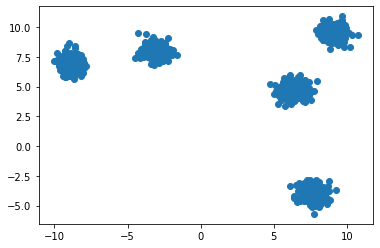

In [67]:
plt.scatter(X[:,0], X[:,1]);

We can visually identify 5 clusters. It seems to be a sensible approach to start with 5 clusters, i.e. set $K = 5$.

In [55]:
K = 5
model = KMeans(n_clusters=K)
model.fit(X)

KMeans(n_clusters=5)

The algorithm needed only two iterations to come up with a result.

In [57]:
model.n_iter_

2

How does our model compare with the marketing segmentation?

Problem: we cannot compare the labels directly as the assigning of numbers to a specific cluster of observations is arbitrarily. We can, however, for example compare if the mean for each variable is similar. 

In [58]:
df["Cluster"] = model.labels_

In [63]:
df.groupby("Segmentation")[["X1","X2"]].mean().mean(axis=1)

Segmentation
0    9.352633
1    2.403563
2    5.495775
3   -0.980329
4    1.879628
dtype: float64

In [64]:
df.groupby("Cluster")[["X1","X2"]].mean().mean(axis=1)

Cluster
0    1.879628
1    2.403563
2    9.352633
3    5.495775
4   -0.980329
dtype: float64

Finally we could also plot the clusters to see if we identified the visually apparent groups. 

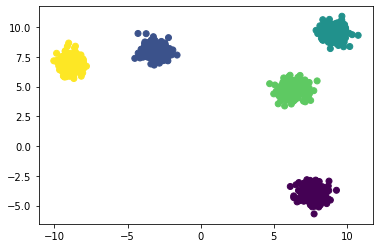

In [68]:
plt.scatter(X[:,0], X[:,1], c=df["Cluster"]);

The algorithm seems to have identified the five segments. 